In [1]:
import pandas as pd

In [2]:
cars= pd.read_csv(r"C:\Users\acreddy\Desktop\datasets\ML.DS\automobile\auto.data", names= ["symboling", "normalized-losses", "make", 
                "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels", "engine-location", "wheel-base", 
                "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", 
                "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"], index_col=False)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# replace "-" with "_" in columns 
cars= cars.rename(columns= lambda x: x.replace("-", "_"))

In [5]:
cars.head(2).transpose()

,0,1
symboling,3,3
normalized_losses,?,?
make,alfa-romero,alfa-romero
fuel_type,gas,gas
aspiration,std,std
num_of_doors,two,two
body_style,convertible,convertible
drive_wheels,rwd,rwd
engine_location,front,front
wheel_base,88.6,88.6


In [6]:
len(cars)

205

In [7]:
# drop the un-necessary columns
cars= cars.drop(["normalized_losses", "aspiration", "engine_location", "engine_type", "fuel_system"], axis=1)

In [8]:
# so drop drive-wheels also has no much variance in the column
cars["drive_wheels"].value_counts()

fwd    120
rwd     76
4wd      9
Name: drive_wheels, dtype: int64

In [9]:
# its also no much variation in the column so drop this as well
cars["body_style"].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body_style, dtype: int64

In [10]:
# dropping make isnt ideal but make has different car brands its not ideal either, should have different datasets for each made
cars["make"].value_counts()

toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: make, dtype: int64

In [11]:
# so drop all the columns as no vairance in the columns as seen above
cars= cars.drop(["drive_wheels", "body_style", "make"], axis=1)

In [12]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [13]:
# convert object cols to float cols
num_cols= ["bore", "stroke", "horsepower", "peak_rpm", "price"]
cars[num_cols] = cars[num_cols].apply(pd.to_numeric, errors='coerce')

# we can achieve it with below way as well
#cars[num_cols]= cars[num_cols].astype(float)

In [14]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 4
stroke               4
compression_ratio    0
horsepower           2
peak_rpm             2
city_mpg             0
highway_mpg          0
price                4
dtype: int64

In [15]:
cars["num_of_doors"].value_counts()

four    114
two      89
?         2
Name: num_of_doors, dtype: int64

In [16]:
# despite num_of_doors having 2-? values its still showing no null values.
cars["num_of_doors"].isnull().sum()

0

In [17]:
# so lets deal with ? in the data
import numpy as np
cars= cars.replace('?', np.nan)

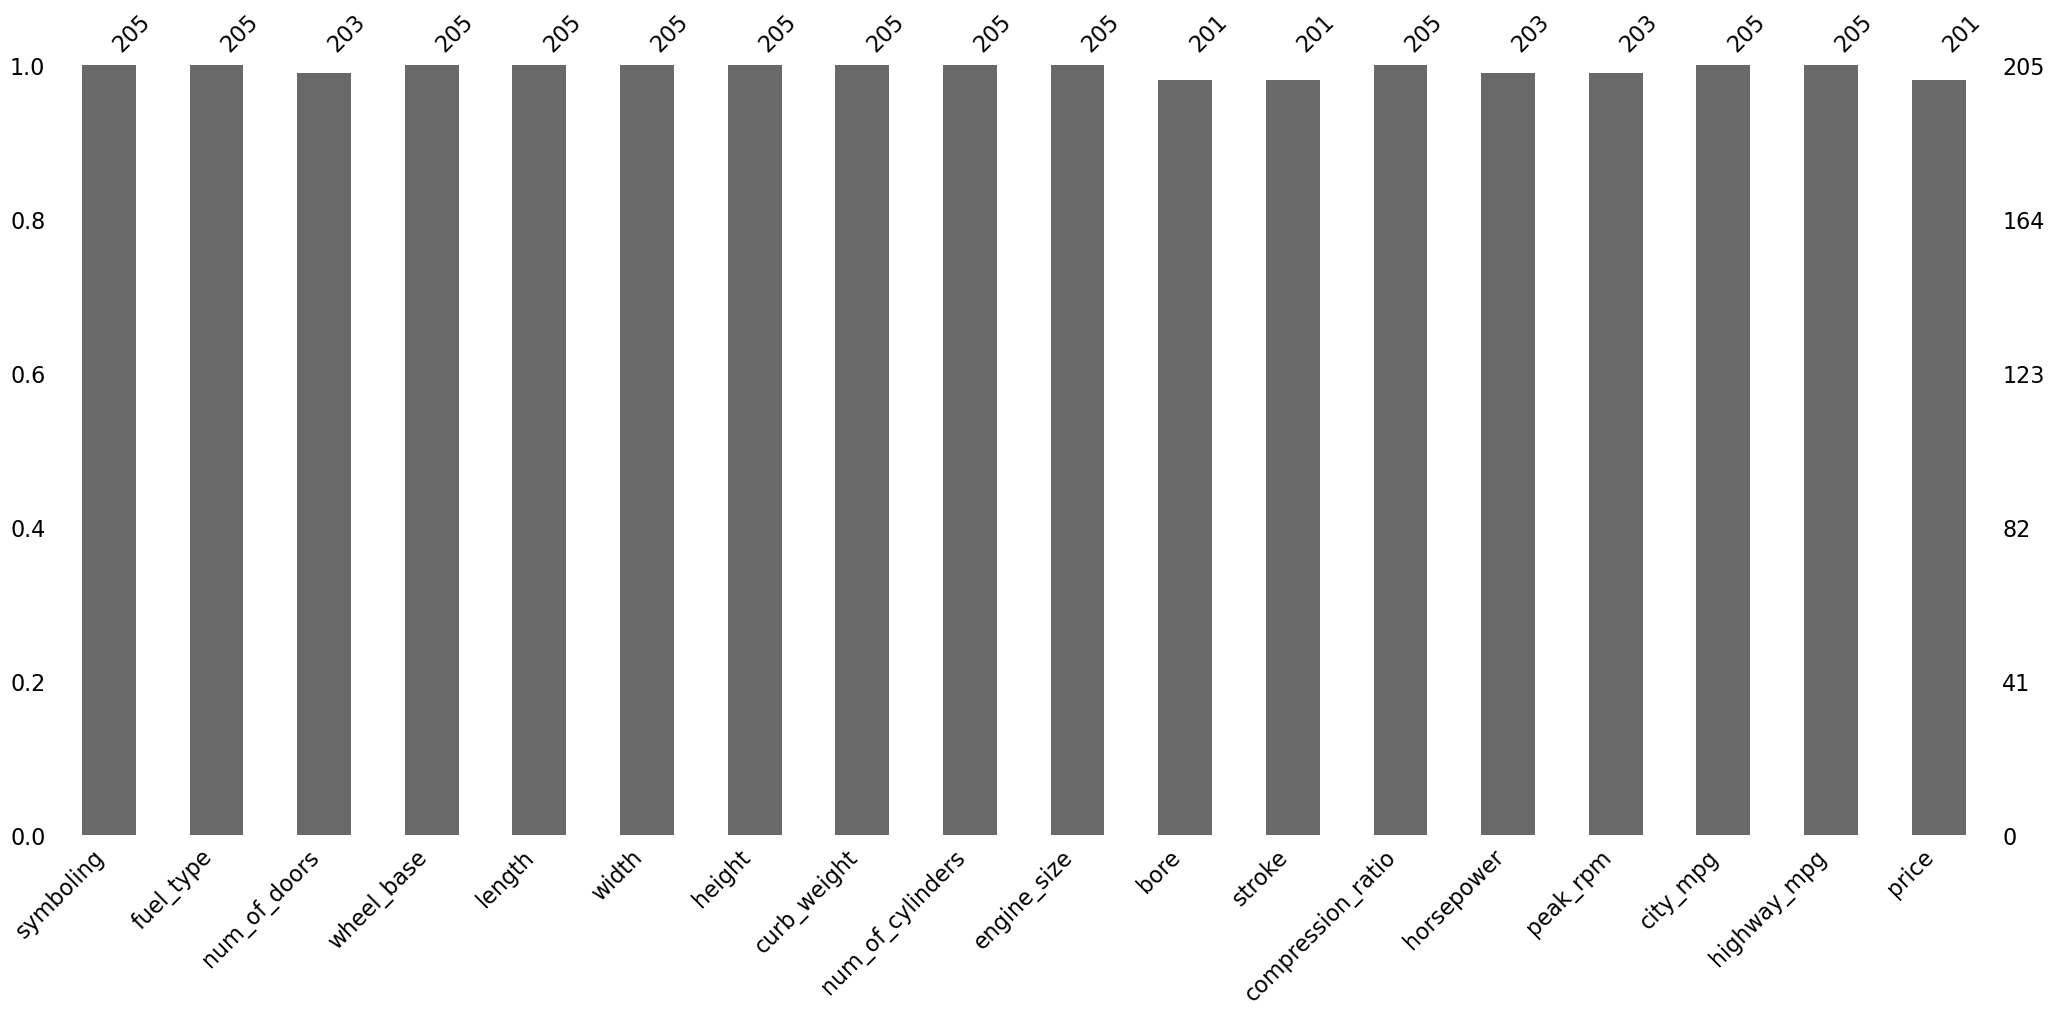

In [18]:
# should deal with null values before doing one-hot-encoding for cat features
# lets find which are the cols having null values pictorially
import missingno as msno
import matplotlib.pyplot as plt

# msno.matrix(cars)
msno.bar(cars)
plt.show()
# note: now its showing missing values in num_of_doors in the below plot.

# Now lets Deal with missing Values

In [19]:
# lets fill the np.nan values for categorical feature using mode(most_frequent)
# Note: except num_of_doors all are numeric features.
cat_to_fill= ["num_of_doors"]
# cars[cat_to_fill]= cars[cat_to_fill].fillna(cars[cat_to_fill].mode())

# I am using SimpleImputer
from sklearn.impute import SimpleImputer
imputer_mean= SimpleImputer(strategy="most_frequent")
cars[cat_to_fill]= imputer_mean.fit_transform(cars[cat_to_fill])

In [20]:
# lets do same for numeric features
num_to_fill= ["bore","stroke", "horsepower", "peak_rpm", "price"]
# cars[num_to_fill]= cars[num_to_fill].fillna(cars[num_to_fill].median())

# i am suing SimpleImputer:
imputer_mean= SimpleImputer(strategy="median")
cars[num_to_fill]= imputer_mean.fit_transform(cars[num_to_fill])

In [21]:
cars.isnull().sum()

symboling            0
fuel_type            0
num_of_doors         0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
num_of_cylinders     0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [22]:
# now i want to change num_of_cylinders(on-hot-encoding give sparse features, label-encoding or mapping would be good
#           so i am using mapping here as lebel encoding introduces the order in the data.)
cars["num_of_cylinders"].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [23]:
# replacing cylinder string values to numeric with replace func
cars["num_of_cylinders"]= cars["num_of_cylinders"].replace({"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12})

# you can achieve same thing with below mapping func as well:
# cylinder_dict= {"two":2, "three":3, "four":4, "five":5, "six":6, "eight":8, "twelve":12}
# cars["num-of-cylinders"] = cars["num-of-cylinders"].map(cylinder_dict)

In [24]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [25]:
cars.head(2).transpose()

,0,1
symboling,3,3
fuel_type,gas,gas
num_of_doors,two,two
wheel_base,88.6,88.6
length,168.8,168.8
width,64.1,64.1
height,48.8,48.8
curb_weight,2548,2548
num_of_cylinders,4,4
engine_size,130,130


In [26]:
cars["fuel_type"].value_counts()

gas       185
diesel     20
Name: fuel_type, dtype: int64

In [27]:
cars.dtypes

symboling              int64
fuel_type             object
num_of_doors          object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [28]:
# fuel-type is object type lets make numeric by one-hot-encoding
cars= pd.get_dummies(cars, columns=["fuel_type"], prefix= "fuel_type", drop_first=True)

In [29]:
# since num_of_doors column has 2door and 4 door cars. let me do label encoding for this column
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cars["num_of_doors"]= le.fit_transform(cars["num_of_doors"])

In [30]:
cars.head(2).transpose()

,0,1
symboling,3.00,3.00
num_of_doors,1.00,1.00
wheel_base,88.60,88.60
length,168.80,168.80
width,64.10,64.10
height,48.80,48.80
curb_weight,2548.00,2548.00
num_of_cylinders,4.00,4.00
engine_size,130.00,130.00
bore,3.47,3.47


In [31]:
cars["num_of_doors"].value_counts()

0    116
1     89
Name: num_of_doors, dtype: int64

In [32]:
cars.dtypes

symboling              int64
num_of_doors           int32
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders       int64
engine_size            int64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg               int64
highway_mpg            int64
price                float64
fuel_type_gas          uint8
dtype: object

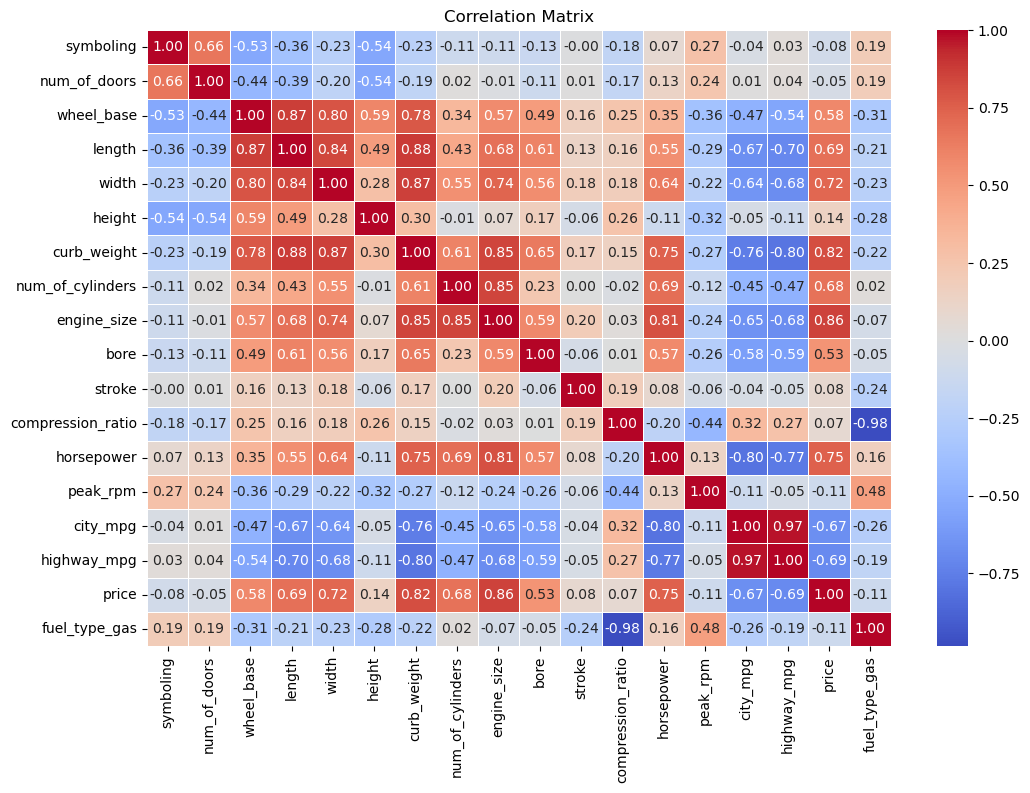

In [33]:
# lets check the correlation between IVs and IVs to Target(price)
import seaborn as sns
import matplotlib.pyplot as plt

correlation=cars.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5, mask= None)
plt.title('Correlation Matrix')
plt.show()

Note:
  The above plot showing the correlation between Ivs and Target and also Between IVs.(We can drop those less correlated columns 
  with Target but its ideal to investigate is there any other relationships exists?).
    
  As its not showing up any non-linear relationships between IVs and Target. Bit if I use "mutual_info_regression" its gives the 
  linear and non-linear relashionships between IVs and Target.

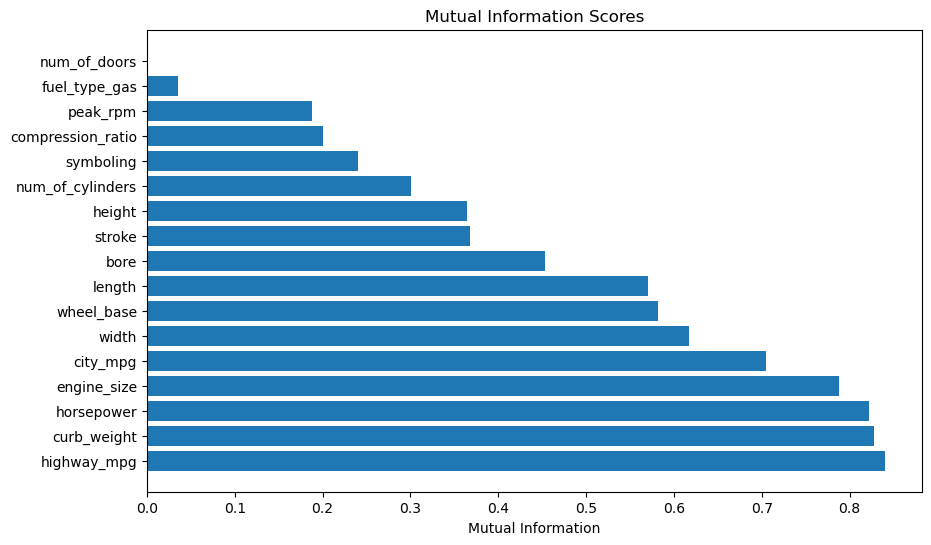

In [34]:
# to check if any linear and non-linear relationships btwn IVs and Target, using mutual_info_regression
from sklearn.feature_selection import mutual_info_regression

target = 'price'
feature_cols = ["symboling", "wheel_base", "length", "width", "height", "curb_weight", "num_of_cylinders", 
                   "engine_size", "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm", "city_mpg", 
                    "highway_mpg", "fuel_type_gas", "num_of_doors"]

# Calculate mutual information between each feature and the target
mi_scores = mutual_info_regression(cars[feature_cols], cars[target])

# Create a DataFrame to visualize mutual information scores and sorting them ascending
mi_df = pd.DataFrame({'Feature': feature_cols, 'Mutual_Information': mi_scores}).sort_values(
                                                                by='Mutual_Information', ascending=False)

# Plot a bar chart of mutual information scores
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'], mi_df['Mutual_Information'])
plt.xlabel('Mutual Information')
plt.title('Mutual Information Scores')
plt.show()

Conclusion:
    
    As the above plot showing num-of-doors-two and fuel-type_gas is having very less mutual info. I can drop those
    colums but I am dropping only num-of-doors_two column only.

In [35]:
# dropping num-of-doors, fuel_type_gas columns as they dont have significance correlation or non-correlation relation on price
cars= cars.drop(["num_of_doors", "fuel_type_gas"], axis=1)

In [36]:
cars.head(2)

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [37]:
# lets get descriptive stats using describe
cars.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


Conclusion:
  -  Mean and Median of the columns seems have closer values 
  -  If we see left tail(25%-min) and right tail(75%-max) are having almost equal values.(except few like cylinders, price..etc)
 
 So both tellling us they likely have a symmetric bell curve distribution
 

In [38]:
import seaborn as sns

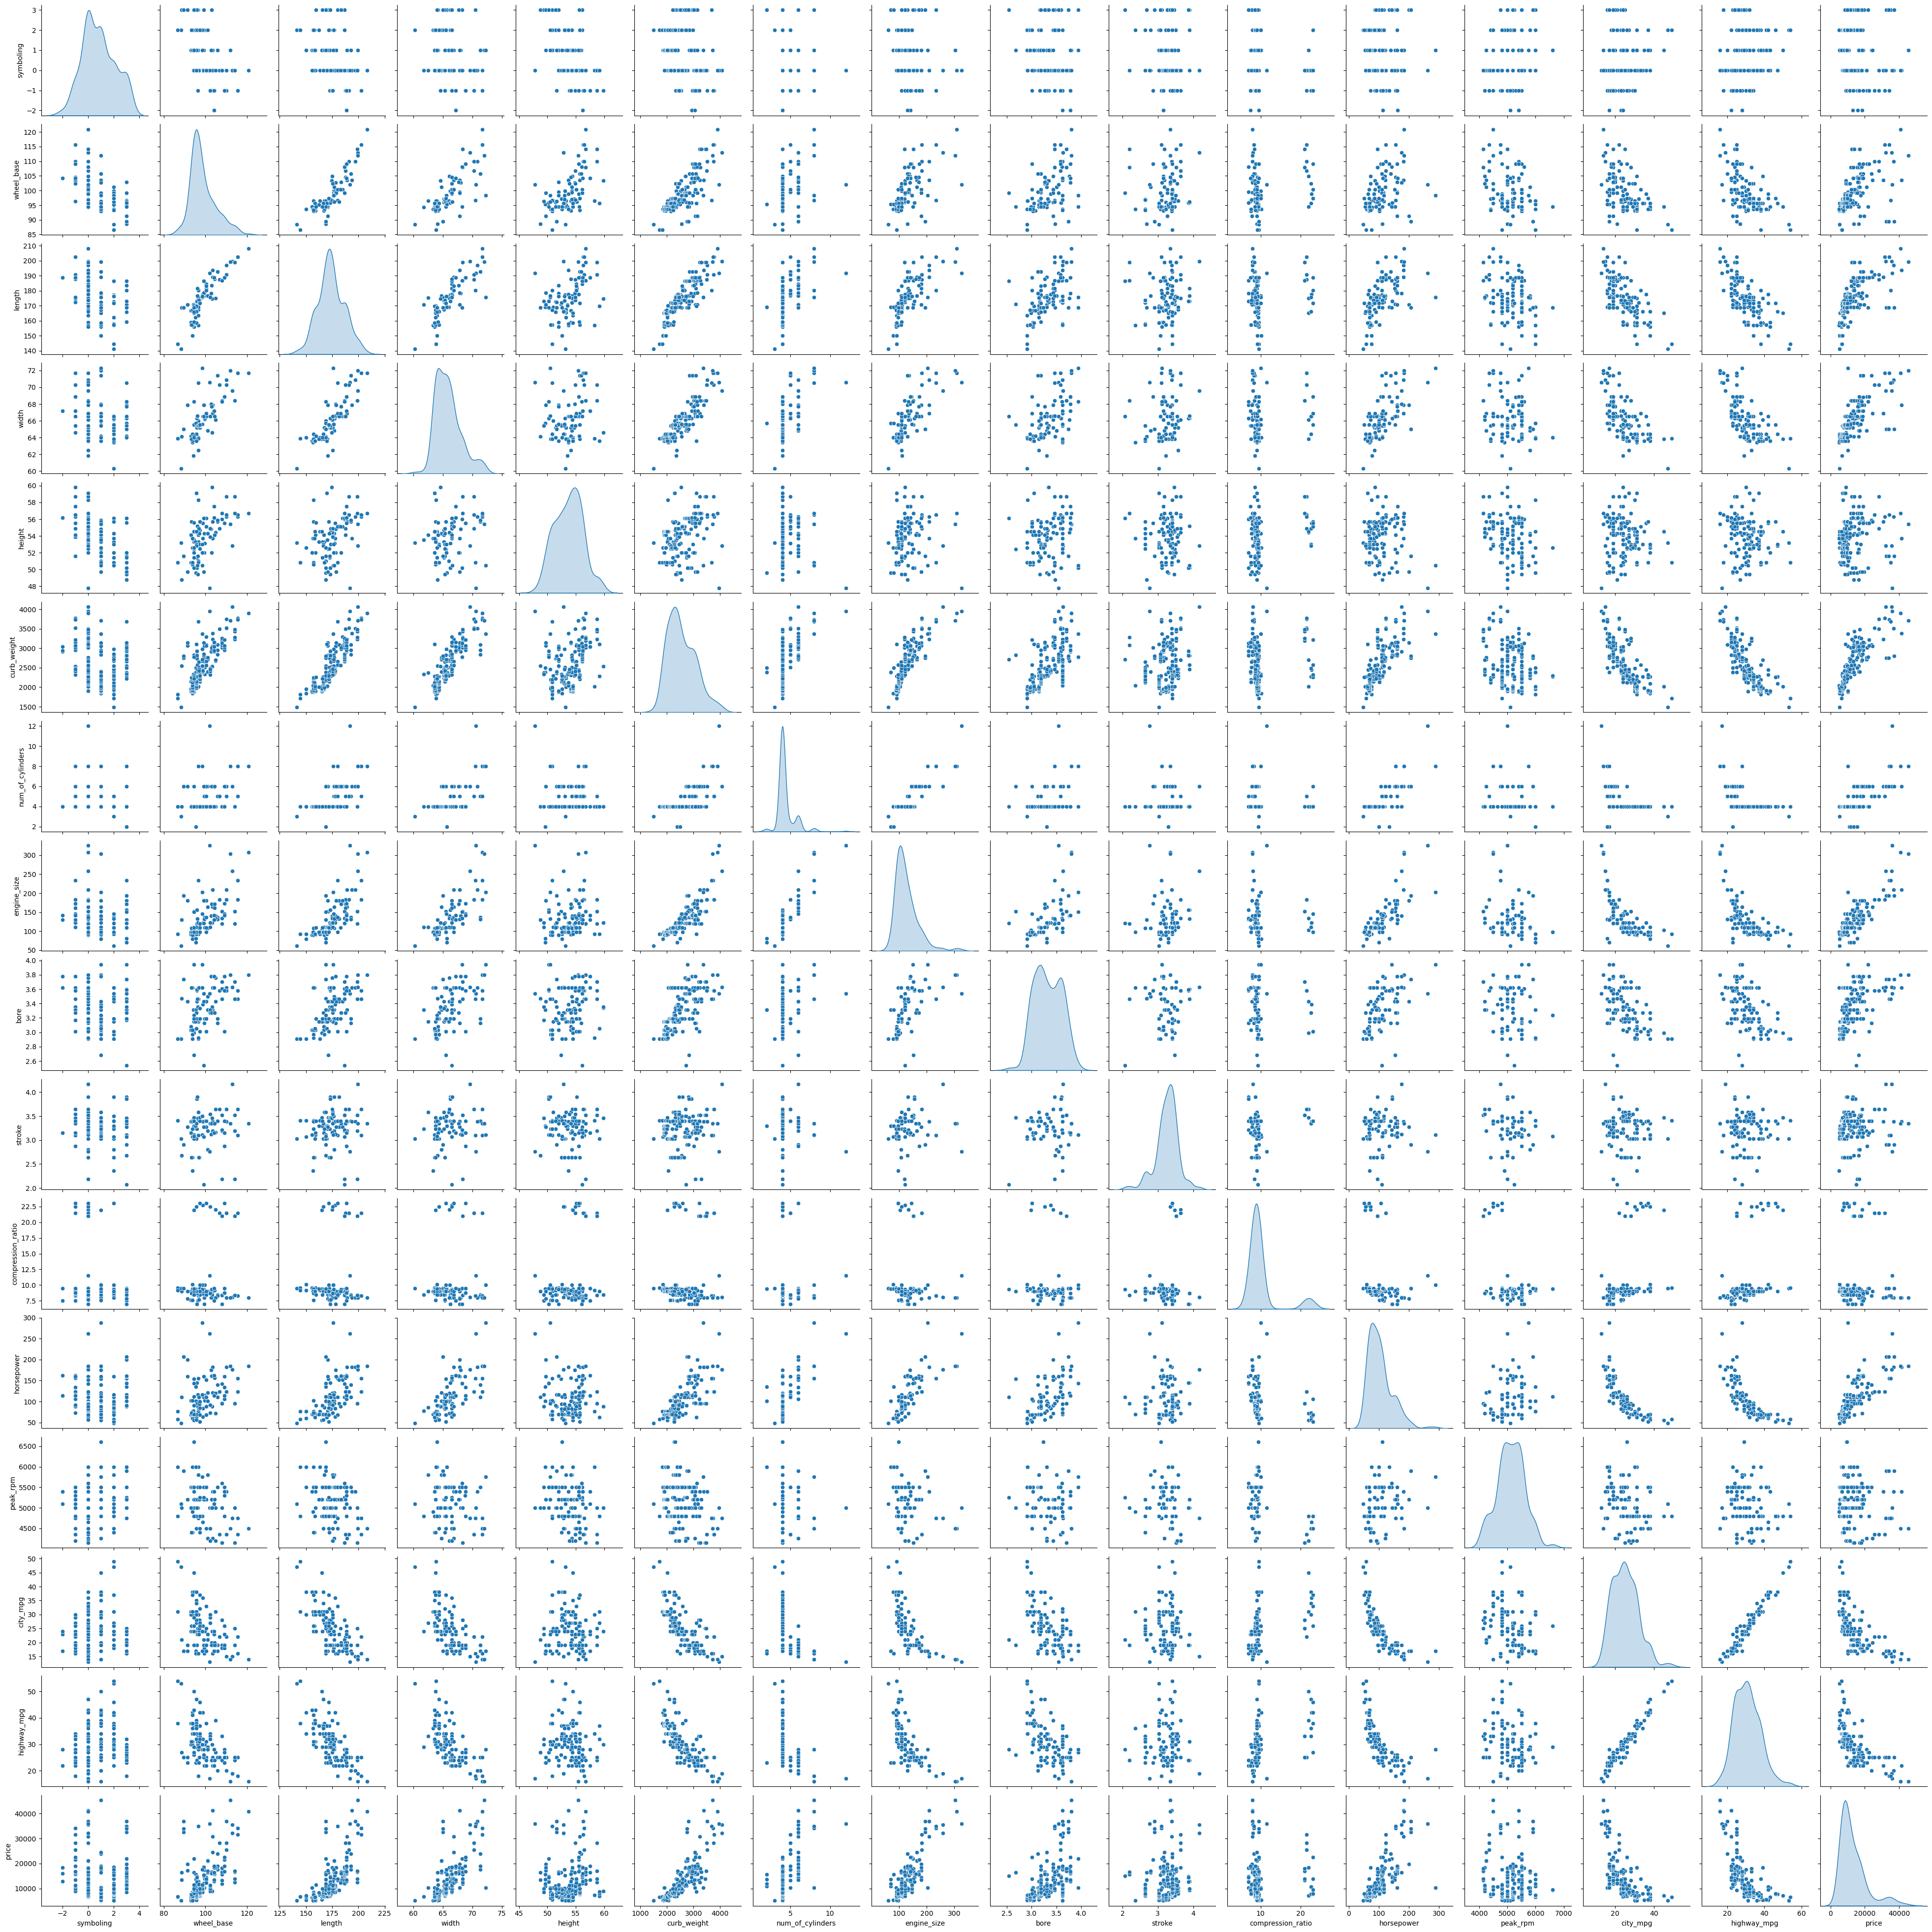

In [39]:
sns.pairplot(cars, diag_kind="kde")

# Generating Data Insights, Statistics and Visualization and Saving Reports

In [40]:
# We can use pandas ydata_profiling to see the statistics, data insights, visualization and we can save the reports as well
from ydata_profiling import ProfileReport

profile= ProfileReport(cars)

In [41]:
# to save the reports
profile.to_file("CARS_profile.html")
profile.to_file("CARS_profile.json")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Render JSON:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [42]:
# lets split the data in to X of IVs and y of Target
X= cars.drop("price", axis=1)
y= cars["price"]

# Build the LineaRegression Model

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, random_state=42)

In [44]:
len(X_train), len(y_train)

(153, 153)

In [45]:
len(X_test), len(y_test)

(52, 52)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
lin_reg.coef_

array([  134.60322345,   341.60615485,  -284.30362706,   827.33507208,
         546.4511263 ,  -663.35989721, -3227.9895498 ,  9458.89660595,
       -1577.30101588, -1659.54154748,  1279.62884582,   -26.75751981,
        1307.36789104, -1232.4526544 ,  -797.84307232])

In [49]:
# lets get the paramters from the model
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficients for {}: {}".format(col_name, lin_reg.coef_[idx]))

The Coefficients for symboling: 134.6032234474858
The Coefficients for wheel_base: 341.6061548513819
The Coefficients for length: -284.3036270591049
The Coefficients for width: 827.3350720775529
The Coefficients for height: 546.4511263007181
The Coefficients for curb_weight: -663.3598972056897
The Coefficients for num_of_cylinders: -3227.989549802709
The Coefficients for engine_size: 9458.896605952368
The Coefficients for bore: -1577.301015884222
The Coefficients for stroke: -1659.54154748204
The Coefficients for compression_ratio: 1279.6288458190595
The Coefficients for horsepower: -26.757519810195816
The Coefficients for peak_rpm: 1307.3678910394706
The Coefficients for city_mpg: -1232.4526543957018
The Coefficients for highway_mpg: -797.8430723175557


In [50]:
intercept= lin_reg.intercept_
intercept

13238.418300653595

In [51]:
# Make predictions on the test set
y_pred = lin_reg.predict(X_test_scaled)

In [52]:
# Calculate r2_score(accuracy) and MSE(mean_squared_error i,e loss/error)
# accuracy = lin_reg.score(X_test, y_test)
from sklearn.metrics import r2_score, mean_squared_error

r2_square= r2_score(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)

In [53]:
mse

13571413.016158832

In [54]:
r2_square

0.7979074738080432

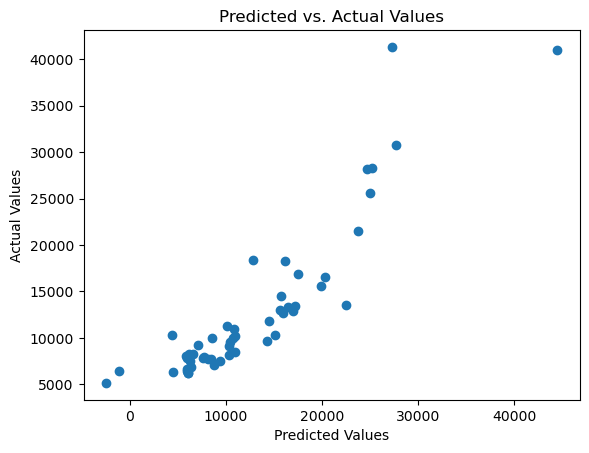

In [55]:
# lets plot the result to check homoscedacity and heteroscedacity
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Predicted vs. Actual Values')
plt.show()

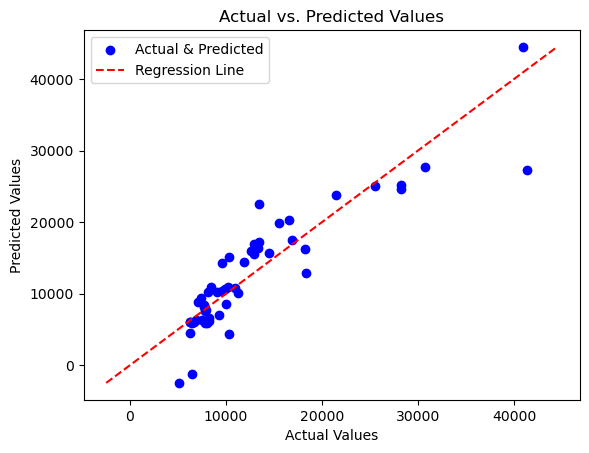

In [56]:
plt.scatter(y_test, y_pred, color="blue", label="Actual & Predicted")

min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Regression Line")


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()

# Show the plot
plt.show()

In [57]:
# Adjusted R-Square
R2_adjust= 1-(1-r2_square)*(len(cars)-1)/(len(cars)-X.shape[1]-1)
R2_adjust

0.7818683844277291

# OLS( Ordinary Least Square ) Method:

In [58]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [59]:
cars= pd.concat([X_train, y_train],axis=1)

In [60]:
cars.head()

,symboling,wheel_base,length,width,height,curb_weight,num_of_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
90,1,94.5,165.3,63.8,54.5,2017,4,103,2.99,3.47,21.9,55.0,4800.0,45,50,7099.0
173,-1,102.4,175.6,66.5,54.9,2326,4,122,3.31,3.54,8.7,92.0,4200.0,29,34,8948.0
93,1,94.5,170.2,63.8,53.5,2024,4,97,3.15,3.29,9.4,69.0,5200.0,31,37,7349.0
5,2,99.8,177.3,66.3,53.1,2507,5,136,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
167,2,98.4,176.2,65.6,52.0,2540,4,146,3.62,3.50,9.3,116.0,4800.0,24,30,8449.0


In [61]:
cars.columns

Index(['symboling', 'wheel_base', 'length', 'width', 'height', 'curb_weight',
       'num_of_cylinders', 'engine_size', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [62]:
ols_model_cars= smf.ols(formula="price~symboling+wheel_base+length+width+height+curb_weight+num_of_cylinders+engine_size+\
                   bore+stroke+compression_ratio+horsepower+peak_rpm+city_mpg+highway_mpg",data=cars).fit()

In [63]:
# get the model parameters
ols_model_cars.params

Intercept           -10526.503812
symboling              107.848656
wheel_base              57.105291
length                 -23.520947
width                  388.595071
height                 222.125592
curb_weight             -1.294046
num_of_cylinders     -2845.651086
engine_size            230.346986
bore                 -5835.577726
stroke               -5459.046945
compression_ratio      342.077715
horsepower              -0.661543
peak_rpm                 2.676600
city_mpg              -200.678570
highway_mpg           -124.924392
dtype: float64

In [64]:
print(ols_model_cars.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     44.67
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.44e-45
Time:                        20:52:39   Log-Likelihood:                -1451.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     137   BIC:                             2983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -1.053e+04   1.84e+0

Note: you can achieve same thing without concatinating X_train and y_train. but we need to convert X_train to constant 
           using statsmodel. Show below:

In [65]:
X_train_const= sm.add_constant(X_train)

In [66]:
ols_model_cars= sm.OLS(y_train, X_train_const).fit()

In [67]:
ols_model_cars.params

const               -10526.503812
symboling              107.848656
wheel_base              57.105291
length                 -23.520947
width                  388.595071
height                 222.125592
curb_weight             -1.294046
num_of_cylinders     -2845.651086
engine_size            230.346986
bore                 -5835.577726
stroke               -5459.046945
compression_ratio      342.077715
horsepower              -0.661543
peak_rpm                 2.676600
city_mpg              -200.678570
highway_mpg           -124.924392
dtype: float64

In [68]:
# these are the params we got from sklearn-LinearReg model:
# array([  134.60322345,   341.60615485,  -284.30362706,   827.33507208,
#          546.4511263 ,  -663.35989721, -3227.9895498 ,  9458.89660595,
#        -1577.30101588, -1659.54154748,  1279.62884582,   -26.75751981,
#         1307.36789104, -1232.4526544 ,  -797.84307232])

Note:  
    
    If you see we got different params than sklearn-LinearReg. Cuz i have applied LinearReg on scaled data. 
                                lets apply ols method on scaled data below and see it

In [69]:
X_train_scaled_const= sm.add_constant(X_train_scaled)

In [70]:
ols_model_scaled_cars = sm.OLS(y_train, X_train_scaled_const).fit()

In [71]:
print(ols_model_scaled_cars.summary(xname= ["const"]+ list(X_train.columns)))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     44.67
Date:                Mon, 04 Dec 2023   Prob (F-statistic):           3.44e-45
Time:                        20:52:40   Log-Likelihood:                -1451.4
No. Observations:                 153   AIC:                             2935.
Df Residuals:                     137   BIC:                             2983.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.324e+04    272.48

In [72]:
# these are the params we got from sklearn-LinearReg model:
# array([  134.60322345,   341.60615485,  -284.30362706,   827.33507208,
#          546.4511263 ,  -663.35989721, -3227.9895498 ,  9458.89660595,
#        -1577.30101588, -1659.54154748,  1279.62884582,   -26.75751981,
#         1307.36789104, -1232.4526544 ,  -797.84307232])

In [73]:
# # Make predictions on the test set
X_test_scaled_const= sm.add_constant(X_test_scaled)
y_pred_ols= ols_model_scaled_cars.predict(X_test_scaled_const)

In [74]:
r2_ols= r2_score(y_test, y_pred_ols)
mse_ols= mean_squared_error(y_test, y_pred_ols)

In [75]:
r2_ols

0.7979074738080438

In [76]:
# both r2 and mse same as sklearn-LinReg
mse_ols

13571413.016158797

Now if you see both(sklearn & statsmodel(OLS)) gave same params.

# Lets use Gradient Descent Model (SGDRegressor)

In [77]:
from sklearn.linear_model import SGDRegressor

In [78]:
sgd_reg= SGDRegressor(max_iter=1000, learning_rate="adaptive", eta0=0.01, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)

# sgd_reg= SGDRegressor(max_iter=100, random_state=42)
# you can give learning_rate="constant", "invscaling" or "adaptive"
# constant: The learning rate is constant throughout training.
# invscaling: The learning rate decreases inversely proportional to the number of iterations.
# adaptive: The learning rate decreases if the loss function is not decreasing.
# due to high collinearity between features max_iter=5000 also getting the below error:(ignore it for now)
# ConvergenceWarning: Maximum number of iteration reached before convergence

c:\Users\acreddy\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='adaptive', random_state=42)

In [79]:
# make predictions on test data
sgd_y_pred= sgd_reg.predict(X_test_scaled)

In [80]:
r_score= r2_score(y_test, sgd_y_pred)
r_score

0.7912500346847947

In [81]:
mse= mean_squared_error(y_test, sgd_y_pred)
mse

14018489.697686981

# Save the Model and Model Params

In [82]:
# there are varius methods to save model and params but i used joblib library
import joblib
import json
from datetime import datetime

# Save the model using joblib, it saves the model with time-stamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_name = f"lin_reg_model_{timestamp}.joblib"
joblib.dump(lin_reg, model_name)

# Save accuracy and loss in to json file
model_info = {
    "coefficients": lin_reg.coef_.tolist(),
    "intercept" : lin_reg.intercept_,
    "r2_score": r2_square,
    "mse": mse
   }

info_filename = f"model_info_{timestamp}.json"
with open(info_filename, "w", encoding= "utf-8") as json_file:
    json.dump(model_info, json_file)

# Use the saved model for predictions on test-data:

In [90]:
# load the saved model
load_model = joblib.load("lin_reg_model_20231204_205241.joblib")

# get model params and  metrics from the JSON file
with open("model_info_20231204_205241.json", "r", encoding= "utf-8") as f:
    loaded_model_info = json.load(f)

# get params
loaded_coefs_ = loaded_model_info["coefficients"]
loaded_intercept_ = loaded_model_info["intercept"]
loaded_r2 = loaded_model_info["r2_score"]
loaded_mse = loaded_model_info["mse"]


In [92]:
loaded_coefs_

[134.6032234474858,
 341.6061548513819,
 -284.3036270591049,
 827.3350720775529,
 546.4511263007181,
 -663.3598972056897,
 -3227.989549802709,
 9458.896605952368,
 -1577.301015884222,
 -1659.54154748204,
 1279.6288458190595,
 -26.757519810195816,
 1307.3678910394706,
 -1232.4526543957018,
 -797.8430723175557]

In [91]:
loaded_r2

0.7979074738080432

In [93]:
# predictions on test data:
y_preds= load_model.predict(X_test_scaled)

In [94]:
y_preds

array([27676.39401536, 15121.34052339, 10433.10172597, 14454.56554049,
       25202.83250742,  5953.74648655,  7629.32730463,  7060.07295734,
       10945.12648702,  8451.17045773, 16428.86301788,  6559.58435422,
       16190.33885762,  8593.23869609, 44462.7950513 ,  5913.6319862 ,
       -2450.15141163, 15906.91681232, 10289.332223  , 10703.97845519,
       10934.07336943, 22497.10848462,  6197.00625967, -1141.58524252,
        5998.24987413, 27313.73051213, 14329.47779308, 17196.96235424,
        5878.3288389 , 16958.22399659, 25018.2569301 ,  6026.71887815,
        7765.22872279, 23734.33684778,  8185.93668437, 24688.10931066,
       10121.93873222, 10812.91198253,  4380.80670695, 15728.21479081,
        9368.98238751, 12847.16010601, 19934.18064491,  6350.83293641,
        6301.1140821 , 10293.38760862,  6026.71887815,  8798.13561871,
       17519.80950471, 15600.31238404,  4533.94696023, 20291.0799088 ])

In [95]:
y_test[:5]

15     30760.0
9      10295.0
100     9549.0
132    11850.0
68     28248.0
Name: price, dtype: float64